In [110]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import scipy.stats as st
import seaborn as sns

colors = ["#D68C45", "#FFC9B9", "#FAFA7E", "#4C956C"]


In [2]:
file = Path("Resources/caffeine.csv")
df=pd.read_csv(file)
df.head()

,drink,Volume (ml),Calories,Caffeine (mg),type
0,Costa Coffee,256.993715,0,277,Coffee
1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee
2,Hell Energy Coffee,250.191810,150,100,Coffee
3,Killer Coffee (AU),250.191810,0,430,Coffee
4,Nescafe Gold,250.191810,0,66,Coffee


In [13]:
# rename columns in lowercase, change type
df=df.rename(columns = {'Volume':'volume', 'Caffeine':'caffeine', 'Calories': 'calories', 'type': 'drink type' })
df.head()

,drink,volume,calories,caffeine,drink type
0,Costa Coffee,256.993715,0,277,Coffee
1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee
2,Hell Energy Coffee,250.191810,150,100,Coffee
3,Killer Coffee (AU),250.191810,0,430,Coffee
4,Nescafe Gold,250.191810,0,66,Coffee


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   drink       610 non-null    object 
 1   Volume      610 non-null    float64
 2   calories    610 non-null    int64  
 3   Caffeine    610 non-null    int64  
 4   drink type  610 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 24.0+ KB


In [14]:
df.describe()

,volume,calories,caffeine
count,610.000000,610.000000,610.000000
mean,346.543630,75.527869,134.693443
std,143.747738,94.799919,155.362861
min,7.393375,0.000000,0.000000
25%,236.588000,0.000000,50.000000
50%,354.882000,25.000000,100.000000
75%,473.176000,140.000000,160.000000
max,1419.528000,830.000000,1555.000000


In [19]:
# max volume, calories, and caffeine are weirdly high
df.sort_values(by="volume", ascending=False)

,drink,volume,calories,caffeine,drink type
29,Starbucks Bottled Iced Coffee,1419.528000,240,640,Coffee
530,McDonalds Sweet Tea,946.352000,160,100,Tea
214,Monster Hydro,751.166900,150,188,Energy Drinks
532,Fuze Iced Tea,709.764000,160,24,Tea
30,Baskin Robbins Cappuccino Blast,709.764000,470,234,Coffee
...,...,...,...,...,...
426,TruBrain Extra,29.573500,25,100,Energy Shots
405,Screamin Energy Max Hit,18.039835,40,185,Energy Shots
406,Vital 4U Liquid Energy,14.786750,34,155,Energy Shots
28,Stok Coffee Shots,12.716605,10,40,Coffee


In [20]:
df.sort_values(by="calories", ascending=False)

,drink,volume,calories,caffeine,drink type
37,Arby's Jamocha Shake,473.176000,830,12,Coffee
30,Baskin Robbins Cappuccino Blast,709.764000,470,234,Coffee
13,Dare Iced Coffee,500.087885,429,160,Coffee
81,Big Train Java Chip Ice Coffee,354.882000,410,49,Coffee
52,Peet's Caffe Mocha,473.176000,390,165,Coffee
...,...,...,...,...,...
372,Zevia Energy Drink,354.882000,0,120,Energy Drinks
376,Advocare Slim,236.588000,0,120,Energy Drinks
382,Great Value Energy Drink Enhancers,236.588000,0,50,Energy Drinks
385,PerformElite Pre-Workout,236.588000,0,225,Energy Drinks


In [21]:
df.sort_values(by="caffeine", ascending=False)

,drink,volume,calories,caffeine,drink type
85,Black Label Brewed Coffee,354.882,0,1555,Coffee
102,Very Strong Coffee,354.882,0,1350,Coffee
92,Devils Brew Extreme Caffeine Coffee,354.882,0,1325,Coffee
101,Taft Coffee (EU),354.882,0,1182,Coffee
95,High Voltage Coffee (AU),354.882,0,1150,Coffee
...,...,...,...,...,...
507,Squirt Soda,354.882,140,0,Soft Drinks
511,Vernors Ginger Ale,354.882,140,0,Soft Drinks
516,Mucho Mango Energy Drink,236.588,100,0,Soft Drinks
437,7-Up,354.882,140,0,Soft Drinks


In [9]:
# Check for duplicates
df["drink"].nunique()

610

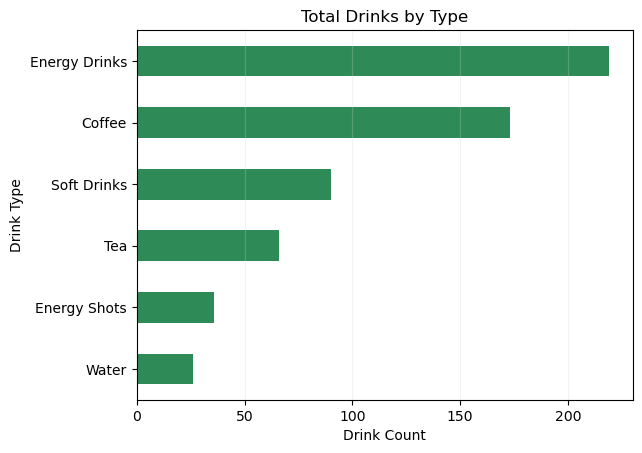

In [25]:
# Bar graph with types
drinks = df["drink type"].value_counts().sort_values(ascending=True)
drinks.plot(kind="barh", ylabel="Drink Type", xlabel="Drink Count", title = "Total Drinks by Type", color="seagreen")
plt.grid(axis="x", color="lightgrey", alpha=0.25)
plt.show()

In [ ]:
# combine energy drinks/shots, coffee and tea, filter out waters to create parent categories for leaderboard

In [26]:
df.head()

,drink,volume,calories,caffeine,drink type
0,Costa Coffee,256.993715,0,277,Coffee
1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee
2,Hell Energy Coffee,250.191810,150,100,Coffee
3,Killer Coffee (AU),250.191810,0,430,Coffee
4,Nescafe Gold,250.191810,0,66,Coffee


In [37]:
df["category"]= "Energy Drinks"
df.loc[df["drink type"] == "Coffee","category"] = "Coffee/Tea"
df.loc[df["drink type"] == "Tea","category"] = "Coffee/Tea"
df.loc[df["drink type"] == "Soft Drinks","category"] = "Soda"
df.loc[df["drink type"] == "Water","category"] = "Water"
df.loc[df["drink type"] == "Energy Drinks","category"] = "Energy Drinks/Shots"
df.loc[df["drink type"] == "Energy Shots","category"] = "Energy Drinks/Shots"
df.category.value_counts()

category
Energy Drinks/Shots    255
Coffee/Tea             239
Soda                    90
Water                   26
Name: count, dtype: int64

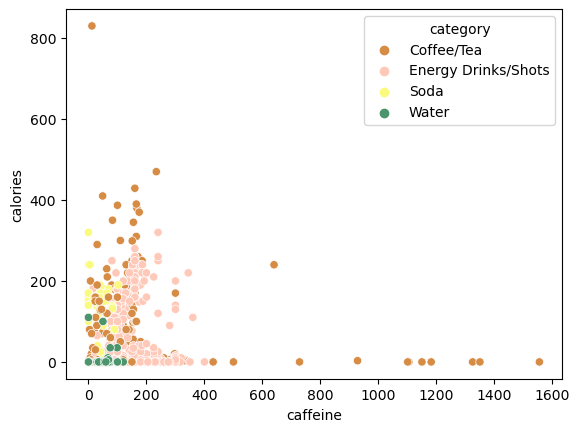

In [118]:
sns.scatterplot(data=df, x="caffeine", y="calories", hue="category", palette=colors)
plt.show()

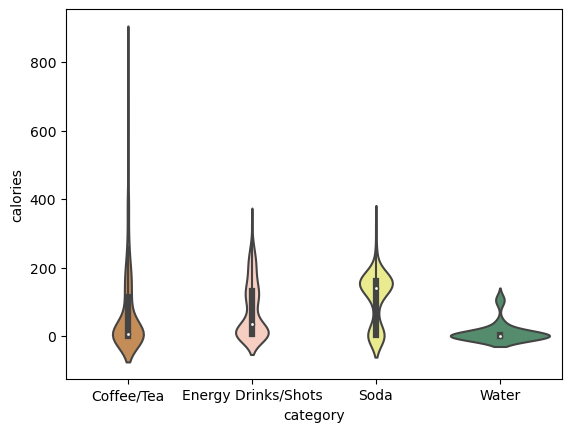

In [117]:
sns.violinplot(data=df, x="category", y="calories", palette=colors)
plt.show()

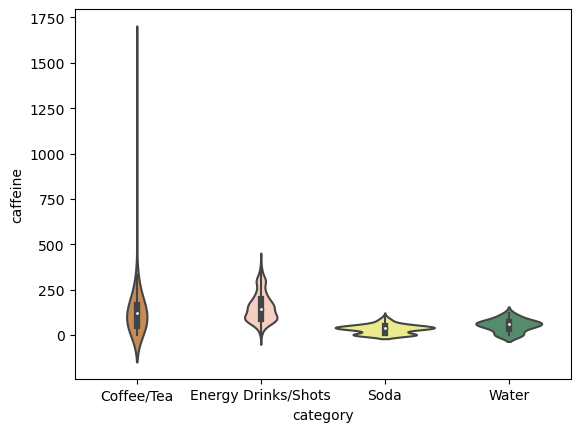

In [116]:
sns.violinplot(data=df, x="category", y="caffeine", palette=colors)
plt.show()

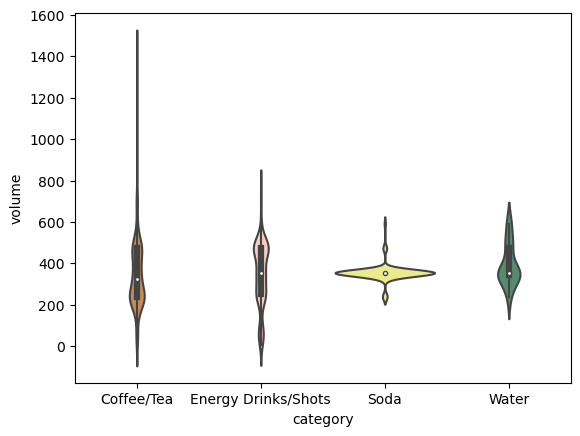

In [114]:
sns.violinplot(data=df, x="category", y="volume", palette=colors)
plt.show()

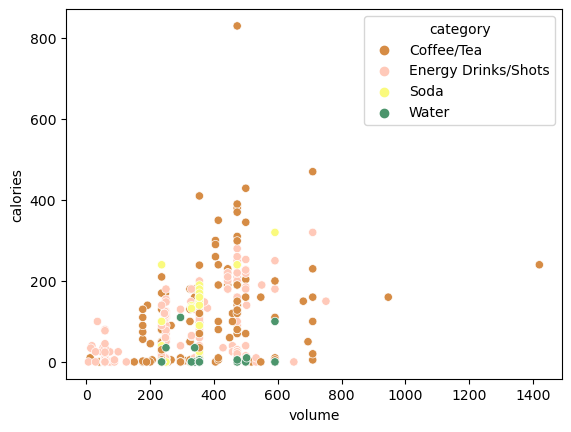

In [119]:
sns.scatterplot(data=df, x="volume", y="calories", hue="category", palette=colors)
plt.show()

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   drink       610 non-null    object 
 1   volume      610 non-null    float64
 2   calories    610 non-null    int64  
 3   caffeine    610 non-null    int64  
 4   drink type  610 non-null    object 
 5   category    610 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 28.7+ KB


In [46]:
df.loc[:,["volume","calories", "caffeine"]].corr()

,volume,calories,caffeine
volume,1.000000,0.341998,0.110770
calories,0.341998,1.000000,-0.126021
caffeine,0.110770,-0.126021,1.000000


In [52]:
for x in df.category.unique():
    print(x)
    display(df.loc[df.category == x,["volume","calories", "caffeine"]].corr())
    print()


Coffee/Tea


,volume,calories,caffeine
volume,1.000000,0.409093,0.162447
calories,0.409093,1.000000,-0.102982
caffeine,0.162447,-0.102982,1.000000



Energy Drinks/Shots


,volume,calories,caffeine
volume,1.000000,0.326900,0.110534
calories,0.326900,1.000000,-0.158162
caffeine,0.110534,-0.158162,1.000000



Soda


,volume,calories,caffeine
volume,1.000000,0.277084,0.073379
calories,0.277084,1.000000,-0.156792
caffeine,0.073379,-0.156792,1.000000



Water


,volume,calories,caffeine
volume,1.000000,0.043064,0.038770
calories,0.043064,1.000000,-0.147638
caffeine,0.038770,-0.147638,1.000000


In [53]:
df.head()

,drink,volume,calories,caffeine,drink type,category
0,Costa Coffee,256.993715,0,277,Coffee,Coffee/Tea
1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee,Coffee/Tea
2,Hell Energy Coffee,250.191810,150,100,Coffee,Coffee/Tea
3,Killer Coffee (AU),250.191810,0,430,Coffee,Coffee/Tea
4,Nescafe Gold,250.191810,0,66,Coffee,Coffee/Tea


In [98]:
df["caffeine_100ml"] = df.caffeine/df.volume*100
df["calories_100ml"] = df.calories/df.volume*100
df.head()

,drink,volume,calories,caffeine,drink type,category,caffeine_10ml,calories_10ml,caffeine_100ml,calories_100ml
0,Costa Coffee,256.993715,0,277,Coffee,Coffee/Tea,10.778474,0.0000,107.784737,0.000000
1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee,Coffee/Tea,5.795553,0.0000,57.955534,0.000000
2,Hell Energy Coffee,250.191810,150,100,Coffee,Coffee/Tea,3.996933,5.9954,39.969334,59.954001
3,Killer Coffee (AU),250.191810,0,430,Coffee,Coffee/Tea,17.186814,0.0000,171.868136,0.000000
4,Nescafe Gold,250.191810,0,66,Coffee,Coffee/Tea,2.637976,0.0000,26.379760,0.000000


In [99]:
for x in df.category.unique():
    print(x)
    display(df.loc[df.category == x,["volume","calories", "caffeine","caffeine_100ml", "calories_100ml" ]].corr())
    print()


Coffee/Tea


,volume,calories,caffeine,caffeine_100ml,calories_100ml
volume,1.000000,0.409093,0.162447,-0.197330,0.181752
calories,0.409093,1.000000,-0.102982,-0.213935,0.917602
caffeine,0.162447,-0.102982,1.000000,0.862237,-0.139445
caffeine_100ml,-0.197330,-0.213935,0.862237,1.000000,-0.145618
calories_100ml,0.181752,0.917602,-0.139445,-0.145618,1.000000



Energy Drinks/Shots


,volume,calories,caffeine,caffeine_100ml,calories_100ml
volume,1.000000,0.326900,0.110534,-0.646098,-0.218562
calories,0.326900,1.000000,-0.158162,-0.276000,0.518352
caffeine,0.110534,-0.158162,1.000000,0.287678,-0.213583
caffeine_100ml,-0.646098,-0.276000,0.287678,1.000000,0.259719
calories_100ml,-0.218562,0.518352,-0.213583,0.259719,1.000000



Soda


,volume,calories,caffeine,caffeine_100ml,calories_100ml
volume,1.000000,0.277084,0.073379,-0.033439,0.031704
calories,0.277084,1.000000,-0.156792,-0.182037,0.960212
caffeine,0.073379,-0.156792,1.000000,0.984448,-0.168080
caffeine_100ml,-0.033439,-0.182037,0.984448,1.000000,-0.178579
calories_100ml,0.031704,0.960212,-0.168080,-0.178579,1.000000



Water


,volume,calories,caffeine,caffeine_100ml,calories_100ml
volume,1.000000,0.043064,0.038770,-0.299305,-0.130185
calories,0.043064,1.000000,-0.147638,-0.128281,0.946101
caffeine,0.038770,-0.147638,1.000000,0.925890,-0.162300
caffeine_100ml,-0.299305,-0.128281,0.925890,1.000000,-0.089144
calories_100ml,-0.130185,0.946101,-0.162300,-0.089144,1.000000


In [100]:
for x in df.category.unique():
    print(x)
    display(df.loc[df.category == x,["volume","calories", "caffeine","caffeine_100ml", "calories_100ml" ]].describe())
    print()


Coffee/Tea


,volume,calories,caffeine,caffeine_100ml,calories_100ml
count,239.000000,239.000000,239.000000,239.000000,239.000000
mean,342.665051,67.769874,160.623431,53.132138,17.480515
std,161.783104,112.777805,221.709081,67.446041,26.878013
min,12.716605,0.000000,0.000000,0.000000,0.000000
25%,236.588000,0.000000,50.000000,19.020407,0.000000
50%,325.308500,5.000000,120.000000,34.870746,1.127135
75%,473.176000,115.000000,165.000000,58.565067,30.163675
max,1419.528000,830.000000,1555.000000,438.173816,175.410418



Energy Drinks/Shots


,volume,calories,caffeine,caffeine_100ml,calories_100ml
count,255.000000,255.000000,255.000000,255.000000,255.000000
mean,342.209465,76.764706,154.298039,87.688772,25.686244
std,152.118572,81.350362,78.599437,148.911333,33.626471
min,7.393375,0.000000,0.000000,0.000000,0.000000
25%,250.043943,5.000000,90.000000,31.975467,2.057105
50%,354.882000,35.000000,142.000000,33.814057,19.020407
75%,473.176000,131.500000,200.000000,61.536610,44.573302
max,751.166900,320.000000,400.000000,1048.235752,281.783804



Soda


,volume,calories,caffeine,caffeine_100ml,calories_100ml
count,90.000000,90.000000,90.000000,90.000000,90.000000
mean,355.243454,111.111111,33.677778,9.506661,31.199914
std,41.509635,75.598354,24.915961,6.849069,21.166006
min,236.588000,0.000000,0.000000,0.000000,0.000000
25%,354.882000,2.500000,9.250000,2.606500,0.704460
50%,354.882000,140.000000,37.000000,10.707785,40.365530
75%,354.882000,160.000000,47.750000,13.455177,45.085409
max,591.470000,320.000000,102.000000,25.148447,101.442170



Water


,volume,calories,caffeine,caffeine_100ml,calories_100ml
count,26.000000,26.000000,26.000000,26.000000,26.000000
mean,394.590111,11.538462,53.730769,14.406834,3.186064
std,99.702740,29.146843,34.060602,10.863597,8.280316
min,236.588000,0.000000,0.000000,0.000000,0.000000
25%,343.791937,0.000000,35.000000,8.453514,0.000000
50%,354.882000,0.000000,60.000000,12.342631,0.000000
75%,473.176000,3.750000,73.750000,22.052646,0.792517
max,591.470000,110.000000,120.000000,39.569641,37.195462


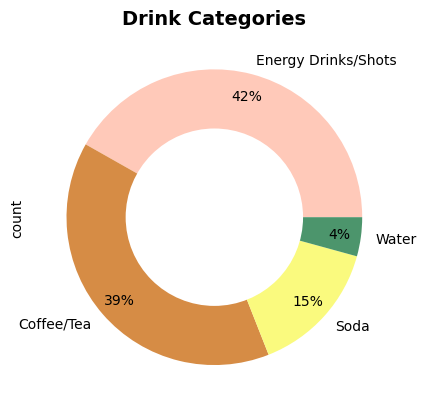

In [127]:
colors2 = ["#FFC9B9","#D68C45", "#FAFA7E", "#4C956C"]
df['category'].value_counts().plot(kind='pie', autopct="%1.0f%%", pctdistance=0.85, colors=colors2)
center_circle = plt.Circle((0,0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Drink Categories", fontweight="bold", fontsize = 14)
plt.show()

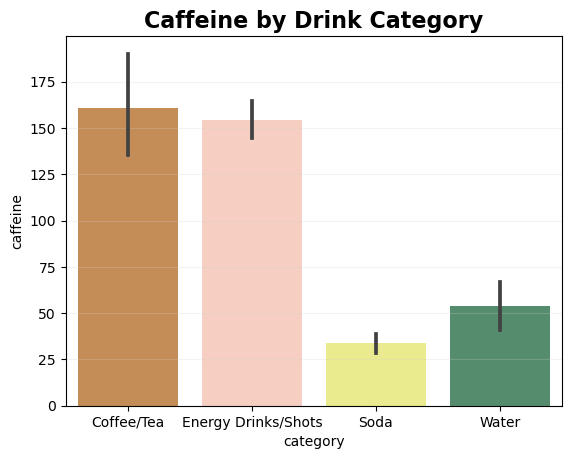

In [112]:
sns.barplot(df, x="category", y="caffeine", palette=colors)
plt.title("Caffeine by Drink Category", fontweight="bold", fontsize=16)
plt.grid(axis="y", color="lightgrey", alpha=0.25)
plt.show()

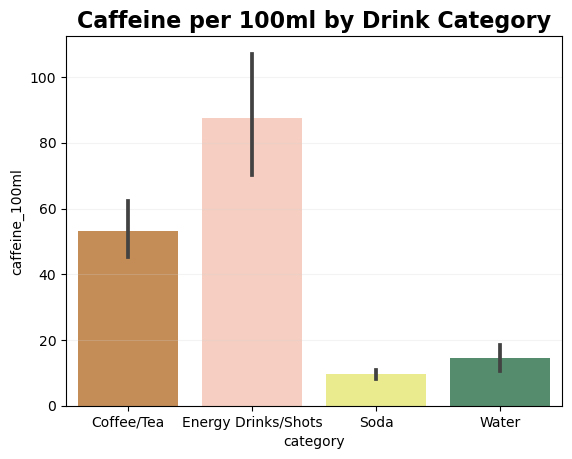

In [113]:
sns.barplot(df, x="category", y="caffeine_100ml", palette=colors)
plt.title("Caffeine per 100ml by Drink Category", fontweight="bold", fontsize=16)
plt.grid(axis="y", color="lightgrey", alpha=0.25)
plt.show()

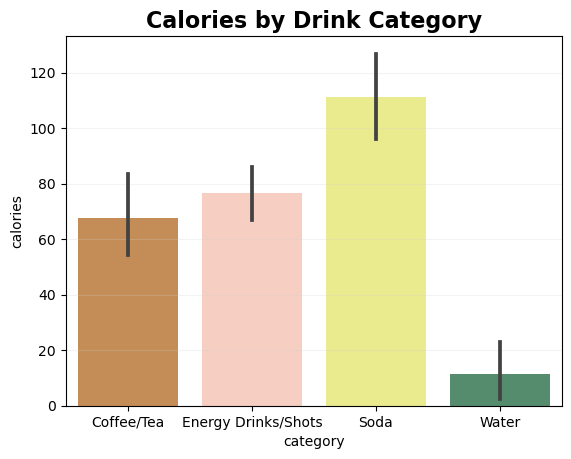

In [124]:
sns.barplot(df, x="category", y="calories", palette=colors)
plt.title("Calories by Drink Category", fontweight="bold", fontsize=16)
plt.grid(axis="y", color="lightgrey", alpha=0.25)
plt.show()

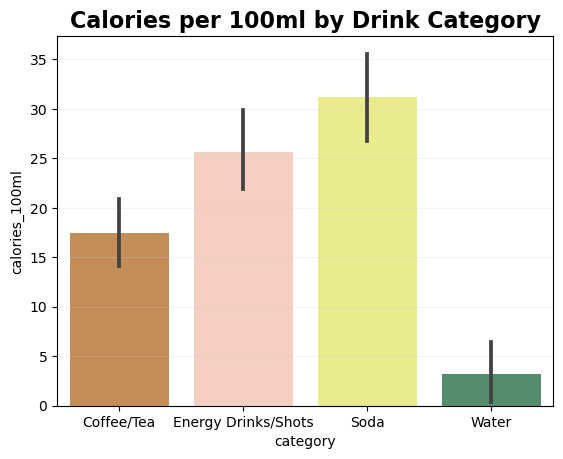

In [123]:
sns.barplot(df, x="category", y="calories_100ml", palette=colors)
plt.title("Calories per 100ml by Drink Category", fontweight="bold", fontsize=16)
plt.grid(axis="y", color="lightgrey", alpha=0.25)
plt.show()